In [1]:
import pickle
import pandas as pd
import numpy as np

import sys
sys.path.append('../src')  # Adjust this path as needed
from metrics import rmse_value, snr, pearson_corr
from vis import plot_eeg

In [3]:
with open('../data/eeg_datasets.pkl', 'rb') as f:
    eeg_datasets_dict = pickle.load(f)

original_datasets = eeg_datasets_dict['datasets']
noisy_datasets = eeg_datasets_dict["datasets_artnoise"]

In [4]:
with open('../data/denoised_data.pkl', 'rb') as f:
    denoised_data_dict = pickle.load(f)

results_wt = denoised_data_dict['results_wavelet_denoising_artnoise']

In [5]:
for dataset_results in results_wt:
    original_dataset = next((d for d in original_datasets if d['name'] == dataset_results['dataset_name']), None)

    metrics_results = pd.DataFrame(columns=['wavelet_type', 'level', 'threshold_mode', 'snr', 'rmse', 'pearson_correlation'])

    signal_original = original_dataset['data']
    parameter_sets = dataset_results['parameter_sets']
    denoised_signals = dataset_results['denoised_signals']
    
    for parameter_set, denoised in zip(parameter_sets, denoised_signals):
        snr_ = np.mean([snr(orig, den) for orig, den in zip(signal_original, denoised)])
        rmse_ = np.mean([rmse_value(orig, den) for orig, den in zip(signal_original, denoised)])
        pearson_ = np.mean([pearson_corr(orig, den) for orig, den in zip(signal_original, denoised)])
        metrics_results.loc[len(metrics_results)] = [parameter_set['wavelet_type'], parameter_set['level'], parameter_set['threshold_mode'], snr_, rmse_, pearson_]

In [6]:
metrics_results.sort_values(by=['rmse']).head(10)
# metrics_results.sort_values(by=['rmse'], ascending=False).head(10)
# metrics_results.head(30)

,wavelet_type,level,threshold_mode,snr,rmse,pearson_correlation
15,coif4,3,hard,6.421879,0.000025,0.873654
14,coif4,3,soft,6.420776,0.000025,0.873622
25,coif8,3,hard,6.417790,0.000025,0.873481
24,coif8,3,soft,6.414014,0.000025,0.873345
45,db8,3,hard,6.401344,0.000025,0.873075
44,db8,3,soft,6.398629,0.000025,0.872956
65,sym8,3,hard,6.395415,0.000025,0.872858
64,sym8,3,soft,6.391769,0.000025,0.872730
35,db4,3,hard,6.389113,0.000025,0.872773
34,db4,3,soft,6.388866,0.000025,0.872759


In [7]:
denoised_signals[18].shape, signal_original.shape, dataset_results['parameter_sets'][18]

((64, 20000),
 (64, 20000),
 {'wavelet_type': 'coif4', 'level': 5, 'threshold_mode': 'soft'})

In [8]:
best_denoised_df = pd.DataFrame(denoised_signals[15].T, columns=original_datasets[0]["ch_names"])
original_df = pd.DataFrame(signal_original.T, columns=original_datasets[0]["ch_names"])
noisy_df = pd.DataFrame(noisy_datasets[0]["noisy_data"].T, columns=original_datasets[0]["ch_names"])

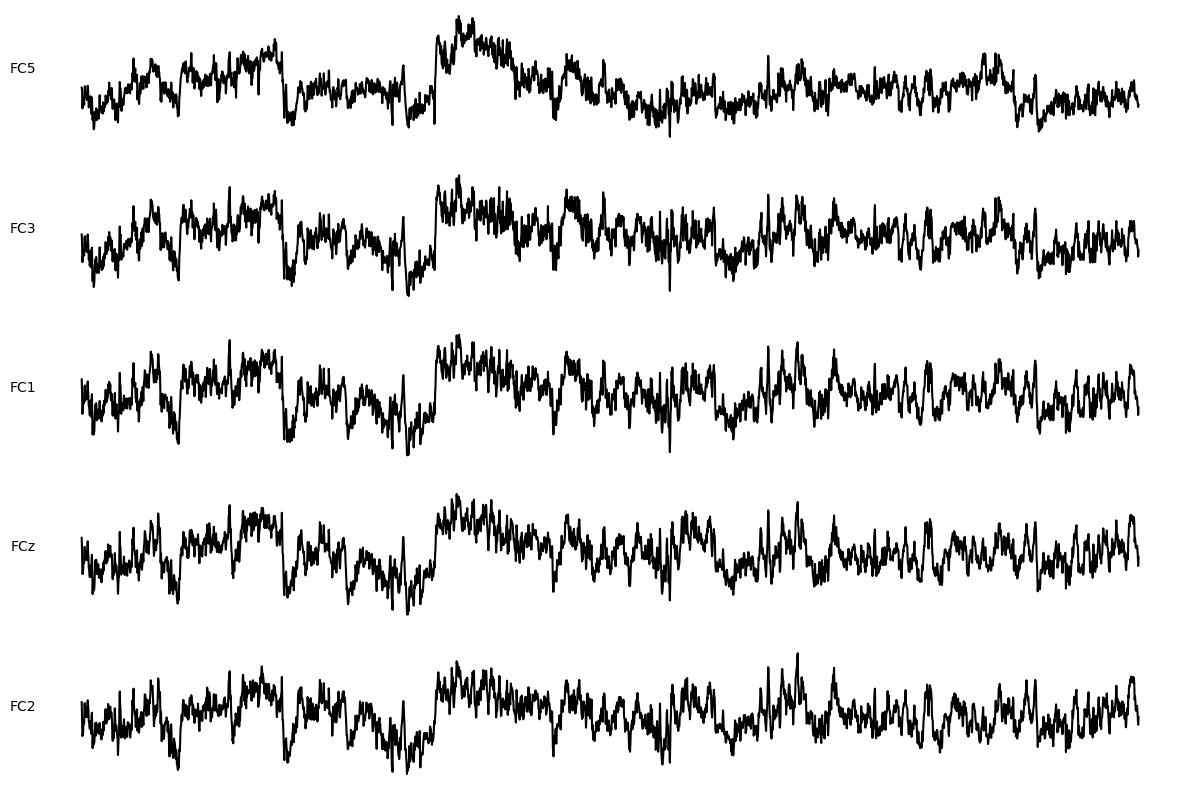

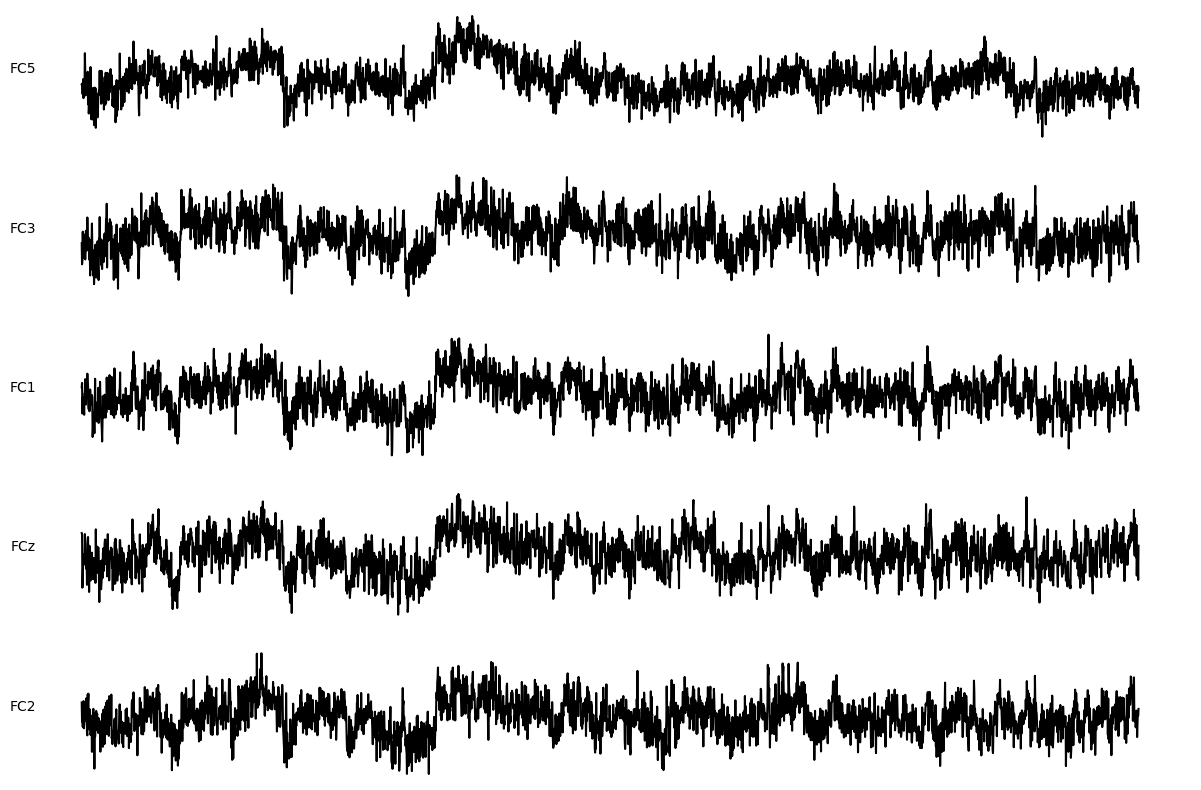

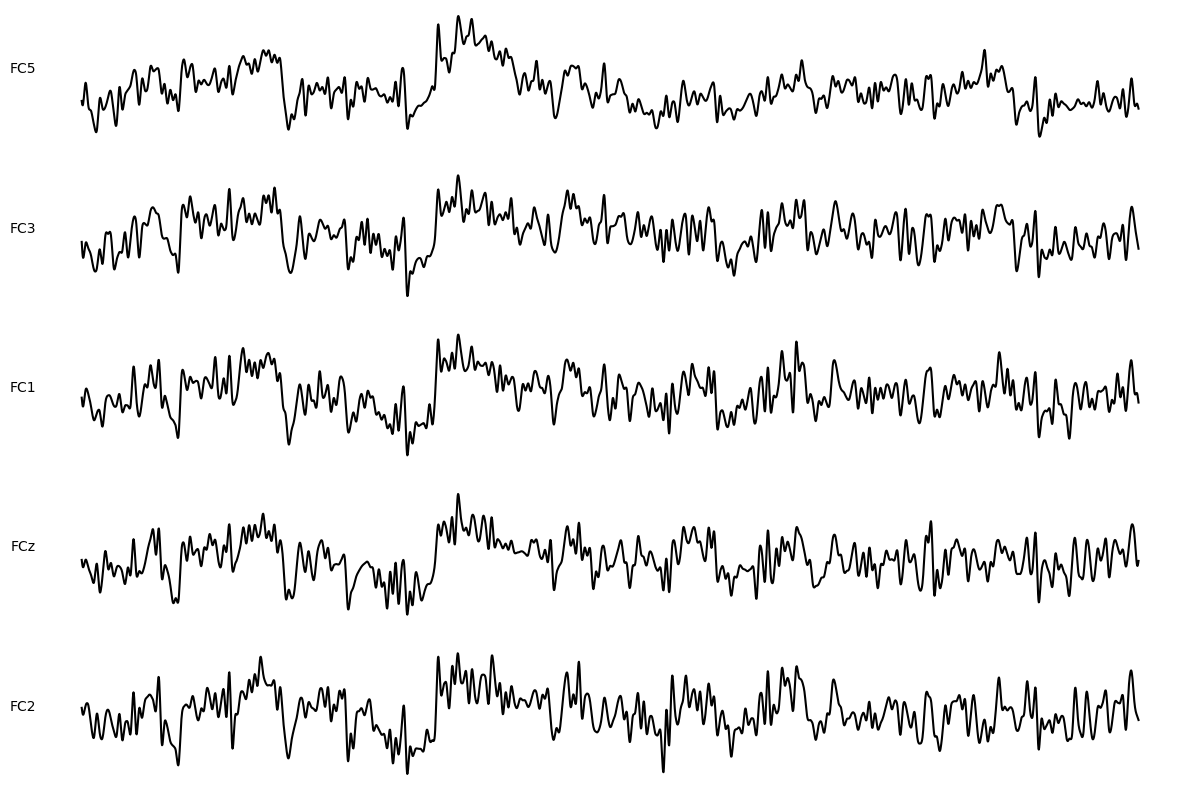

In [9]:
plot_times = range(0, 3000)
plot_eeg(original_df.iloc[plot_times,:], 5)
plot_eeg(noisy_df.iloc[plot_times,:], 5)
plot_eeg(best_denoised_df.iloc[plot_times,:], 5)